/Users/duyngo/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


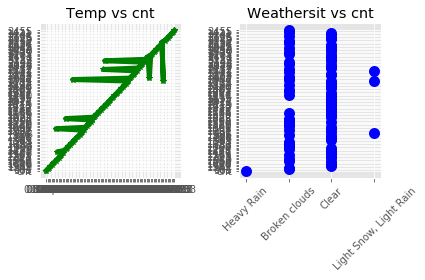

In [352]:
import re
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
df = pd.read_csv('day.csv', names=['instant','dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
                                     'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual','registered','cnt'])




#print(df)
#df.describe()
#print(df['temp'].value_counts())

plt.rcParams.update({'figure.autolayout': True})


plt.style.use('ggplot')
fig, (ax0, ax1) = plt.subplots(ncols=2)
x = (df['temp'])[:100]
y = (df['cnt'])[:100]
ax0.plot(x, y, color='g', marker='*', linewidth=5)
ax0.set_title('Temp vs cnt')

x = (df['weathersit'])[:100]
y = (df['cnt'])[:100]
labels = ['Heavy Rain', 'Broken clouds','Clear', ' Light Snow, Light Rain']
ax1.set_xticklabels(labels, rotation=45)
ax1.scatter(x, y, color='b', marker='o', linewidth=5)
ax1.set_title('Weathersit vs cnt')
plt.show()


In [353]:
#Preprocessing data==========================
df = df.dropna(0)
df = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual','registered','cnt']]
df.drop('dteday', 1, inplace=True)
X = (df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual','registered']])[1:]
y = (df[['cnt']])[1:]
print(y.shape)
print(X.shape)
old_x = X
    

      


(731, 1)
(731, 13)


# Remove Skew

Skewed data is data that has a distribution that is 
pushed to one side of the other (larger or smaller values) rather than being normally distributed. 
Some methods assume normally distributed data and cna perform beter if the skew is removed.  

In [324]:
try:
    windspeed = X['windspeed']
    windspeed = pd.to_numeric(windspeed, errors='coerce')
except:
    pass

def find_outliers_tukey(x):
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

try:
    tukey_indices, tukey_values = find_outliers_tukey(windspeed)
except:
    pass
print(tukey_indices, tukey_values)
print(X.shape)
print(X)

#X = X.drop(tukey_indices, axis=0, inplace=True)
    

[45, 50, 94, 95, 293, 383, 408, 421, 433, 434, 451, 667, 722] [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.40921199999999996, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]
(731, 13)
    season yr mnth holiday weekday workingday weathersit       temp  \
1        1  0    1       0       6          0          2   0.344167   
2        1  0    1       0       0          0          2   0.363478   
3        1  0    1       0       1          1          1   0.196364   
4        1  0    1       0       2          1          1        0.2   
5        1  0    1       0       3          1          1   0.226957   
6        1  0    1       0       4          1          1   0.204348   
7        1  0    1       0       5          1          2   0.196522   
8        1  0    1       0       6          0          2      0.165   
9        1  0    1       0       0          0          1   0.138333   
10       1  0    1       0       1          1          1   0.150833   
11     

AttributeError: 'NoneType' object has no attribute 'drop'

In [354]:
X = StandardScaler().fit_transform(X)
print(X)


#features are the columns of x
features = X.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvalues {}'.format(eig_vals))
print(X.shape)
print(y.shape)

[[-1.34821315 -1.00136893 -1.60016072 ... -0.38789169 -0.7537338
  -1.9254707 ]
 [-1.34821315 -1.00136893 -1.60016072 ...  0.74960172 -1.04521412
  -1.91520896]
 [-1.34821315 -1.00136893 -1.60016072 ...  0.74663186 -1.06124554
  -1.5566892 ]
 ...
 [-1.34821315  0.99863295  1.58866019 ... -0.85355213 -1.00440687
  -1.58683308]
 [-1.34821315  0.99863295  1.58866019 ...  2.06944426 -0.70563955
  -1.42649329]
 [-1.34821315  0.99863295  1.58866019 ... -0.46020122 -0.59633443
  -0.87620714]]
[[ 1.00136986e+00 -1.84686906e-03  8.32579073e-01 -1.05510925e-02
  -3.08410035e-03  1.25020659e-02  1.92373445e-02  3.34772822e-01
   3.43345305e-01  2.05726196e-01 -2.29360099e-01  2.10687383e-01
   4.12186919e-01]
 [-1.84686906e-03  1.00136986e+00 -1.79488923e-03  7.96520712e-03
  -5.46824569e-03 -2.01537821e-03 -4.87932899e-02  4.76687823e-02
   4.61693076e-02 -1.10802621e-01 -1.18332477e-02  2.48886138e-01
   5.95062207e-01]
 [ 8.32579073e-01 -1.79488923e-03  1.00136986e+00  1.92171842e-02
   9.5223

/Users/duyngo/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/duyngo/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [355]:
projected_X = X.dot(eig_vecs.T)

X = pd.DataFrame(projected_X)

#Same as in sklearn========================
pca = decomposition.PCA(n_components=13)
X = pca.fit_transform(X)
X = pd.DataFrame(X)

print(X.shape)
print(y.shape)


(731, 13)
(731, 1)


In [364]:
print(X.shape)
print(y.shape)


kfold = KFold(n_splits=10, random_state=2)

def accuracy_score(model):
    model_name = ''
    match = re.match(r'\w+', str(model))
    if match:
        model_name = match.group()
    print('Error for', model_name, ': ')
    scorings = ['neg_mean_squared_error', 'neg_mean_absolute_error']
    for scoring in scorings:
        results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        print(str(-(results.mean())))
    
    return -(results.mean())
        
reg = LinearRegression()
clf = DecisionTreeRegressor()

if accuracy_score(reg) > accuracy_score(clf):
    print('Linear Regression is more accurate')
else:
    print('Decision Tree is more accurate')

    
for i in range(10):
    print()

(731, 13)
(731, 1)
Error for LinearRegression : 
6.116538958310415e-24
1.8573508192805772e-12
Error for DecisionTreeRegressor : 
907063.8557571269
727.1242687893372
Decision Tree is more accurate










